# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Original data comprised on 52,944 contacts made by the Portugese retail bank from May 2008 through June 2013. Additional data related to the clients social and economic influence features were gathered externally from the central bank of the Portugene Republic statistical website. 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
print('Duplicated Entries =', df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum(), 'duplicate entries after them' )

print('Are there any missing values?')
print(df.isna().mean())
print("No missing values")

Duplicated Entries = 12
0 duplicate entries after them
Are there any missing values?
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64
No missing values


In [5]:
print('Changing categorical value for customer sucess yes to 1 and no to 0')
df = df.replace({'yes': 1, 'no': 0})

Changing categorical value for customer sucess yes to 1 and no to 0


In [6]:
print('Other attributes will be adjusted based on exploratory data analysis')

Other attributes will be adjusted based on exploratory data analysis


In [7]:
# Create two Series to establish baseline acceptance rate
series1 = pd.Series(df['y'].value_counts(), name='Count')
series2 = pd.Series(100*df['y'].value_counts(normalize=True).round(3), name='%Acceptance')

# Horizontally concatenate the Series into a DataFrame
df2 = pd.concat([series1, series2], axis=1)
print(df2)


   Count  %Acceptance
y                    
0  36537         88.7
1   4639         11.3


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

-  11% customer subscription rate was the baseline based on the 52,944 customers that were considered between May 2008 to Jun 2013. Objective is to maximize selling bank long term financial assets with effective marketing campaigns by making fewer contacts while retaining same or higher success of clients subscribing to the deposit.
- Due to the imbalanced data, the area under the ROC curve was used as a metric for comparing the different models. High AUC for ROC curve implies both high TPR and low FPR 
- All models were checking with Probabilites was another measure for evaluating model as it is a measure of the AUC
- Data Mining is used to identify the relationships between customer profile characteristics (predictors) and if they accepted the service (target). Logistic Regression, K Nearest Neighbor (KNN), Decision Trees, and Support Vector Machines (SVMs) are used for evaluation 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [9]:

# Get the unique value counts
unique_counts = df.nunique()

# Create a list to store the results
results = []

# Populate the list
for col in df.columns:
    unique_vals = df[col].unique()
    unique_count = unique_counts[col]
    
    if unique_count < 6:
        unique_vals_display = unique_vals.tolist()
    else:
        unique_vals_display = ">6 unique values"
    
    results.append({
        'Attribute': col,
        'Unique Count': unique_count,
        'Unique Values': unique_vals_display
    })

# Convert the list to a DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Attribute', inplace=True)
results_df

,Unique Count,Unique Values
Attribute,,
age,78,>6 unique values
job,12,>6 unique values
marital,4,"[married, single, divorced, unknown]"
education,8,>6 unique values
default,3,"[0, unknown, 1]"
housing,3,"[0, 1, unknown]"
loan,3,"[0, 1, unknown]"
contact,2,"[telephone, cellular]"
month,10,>6 unique values


In [10]:
print('Summarize statistics of Numerical Attributes') 
df.describe()

Summarize statistics of Numerical Attributes


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


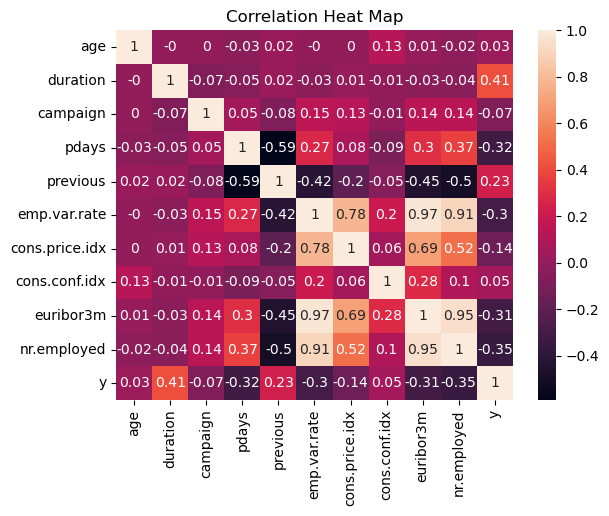

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

corr = df.corr(numeric_only = True).round(2)
corr
sns.heatmap(corr, annot = True)
plt.title('Correlation Heat Map')
plt.show() 

In [12]:
print('Summarize statistics of Categorical Attributes') 
df.describe(include = 'object')


Summarize statistics of Categorical Attributes


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,0,1,0,cellular,may,thu,nonexistent
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551


In [13]:
cat_list =df.select_dtypes("object").columns.tolist()

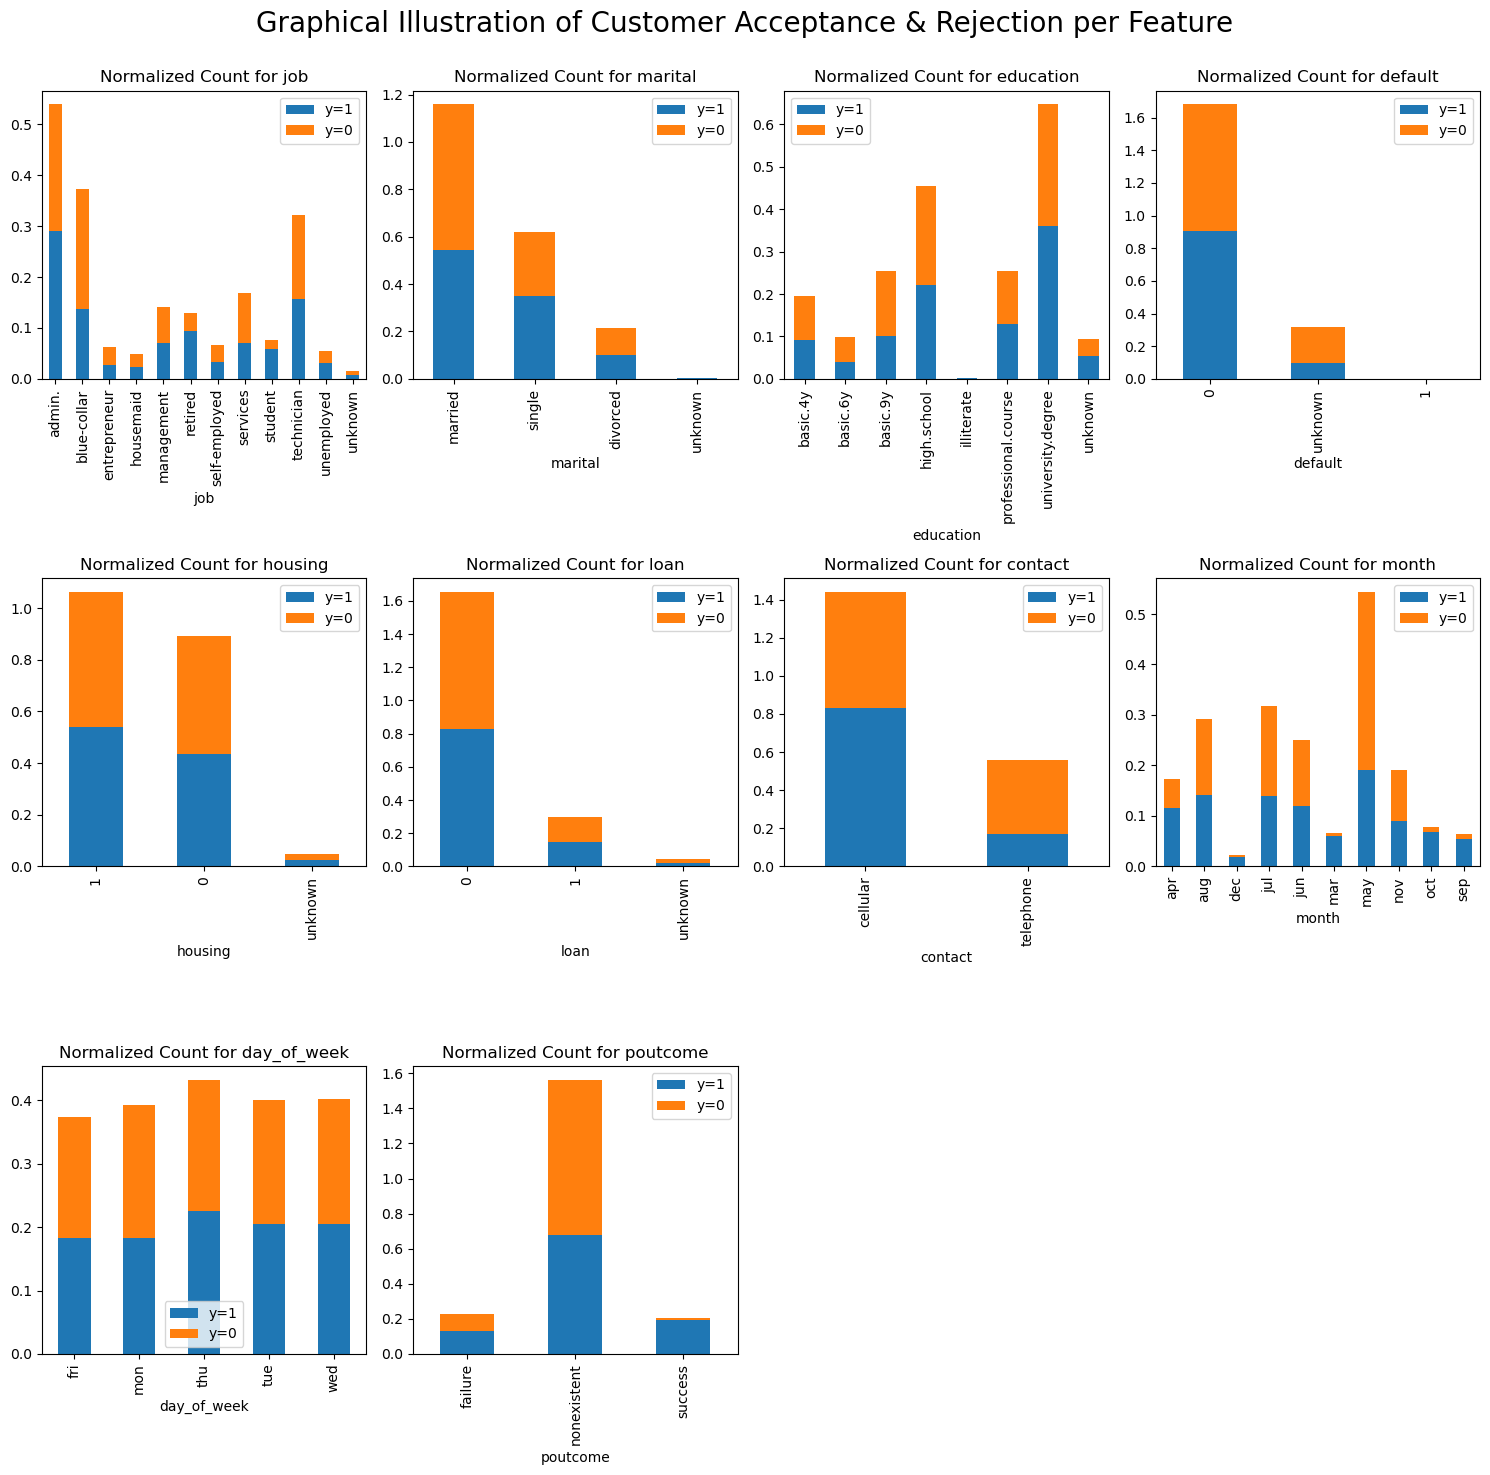

In [14]:
plt.figure(figsize=(15, 15))
ii = 1
plt.suptitle('Graphical Illustration of Customer Acceptance & Rejection per Feature\n', fontsize = 20)
for cat in cat_list:
    plt.subplot(3, 4, ii)
    
    # Filter the DataFrame based on the condition df['y'] == 1 or df['y'] == 0
    df_y_1 = df[df['y'] == 1][cat].value_counts(normalize=True, sort=True)
    df_y_0 = df[df['y'] == 0][cat].value_counts(normalize=True, sort=True)
    
    # Combine the value counts into a single DataFrame
    counts_df = pd.DataFrame({'y=1': df_y_1, 'y=0': df_y_0}).fillna(0)
    
    # Plot the stacked bar chart
    counts_df.plot(kind='bar', stacked=True, ax=plt.gca(), title=f'Normalized Count for {cat}')
    
    ii += 1

plt.tight_layout()
plt.show()

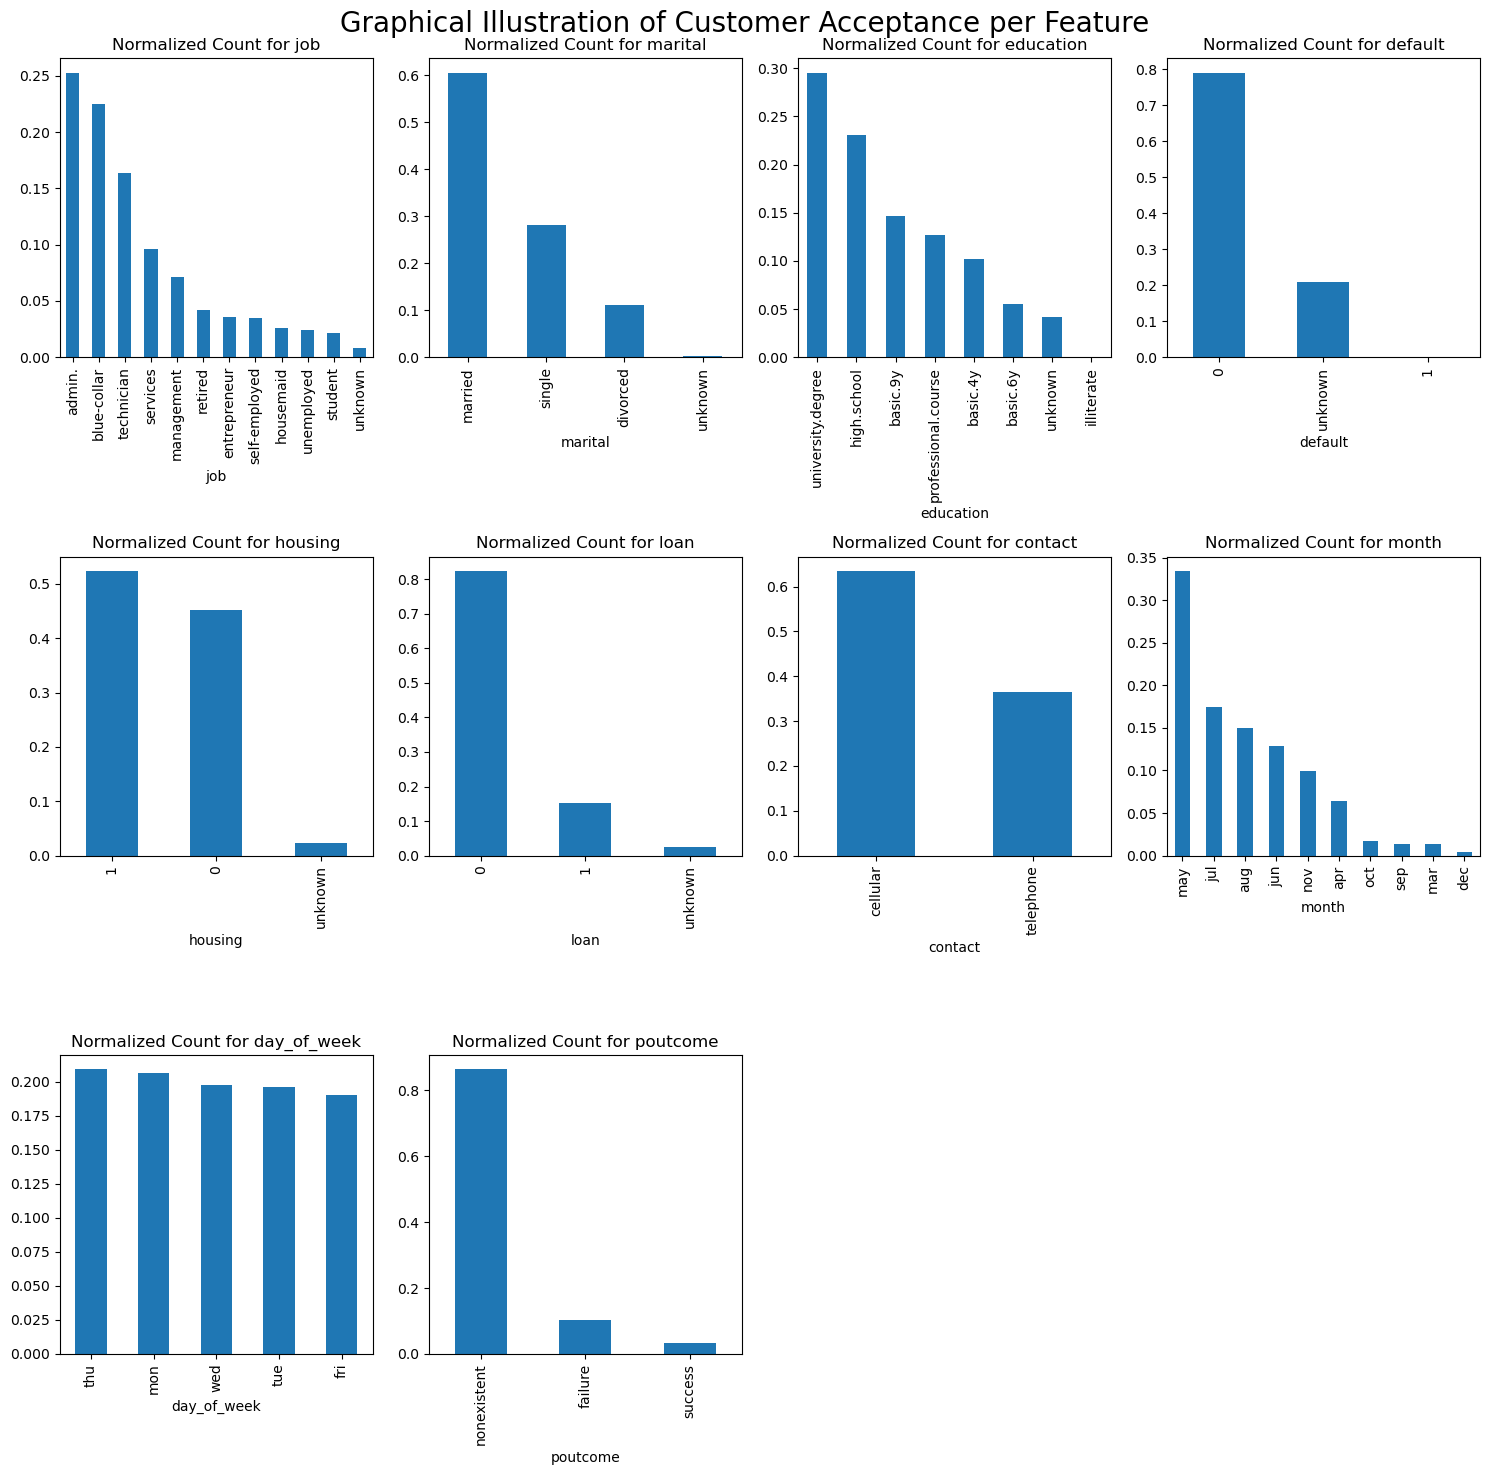

In [15]:
ii=1
plt.figure(figsize = (15,15))

plt.suptitle('Graphical Illustration of Customer Acceptance per Feature', fontsize = 20)

for cat in cat_list:
    plt.subplot(3,4,ii)
    df[cat].value_counts(normalize=True, sort = True).plot(kind = 'bar', title =f'Normalized Count for {cat}')
    ii =ii +1
plt.tight_layout()  
#     plt.show()

In [16]:
df2 =df # make a copy
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Data Preparation: reducing dimensions based on mean values for the following features. Mapped features can be looked up as the dataframe is modified for tracability 

0

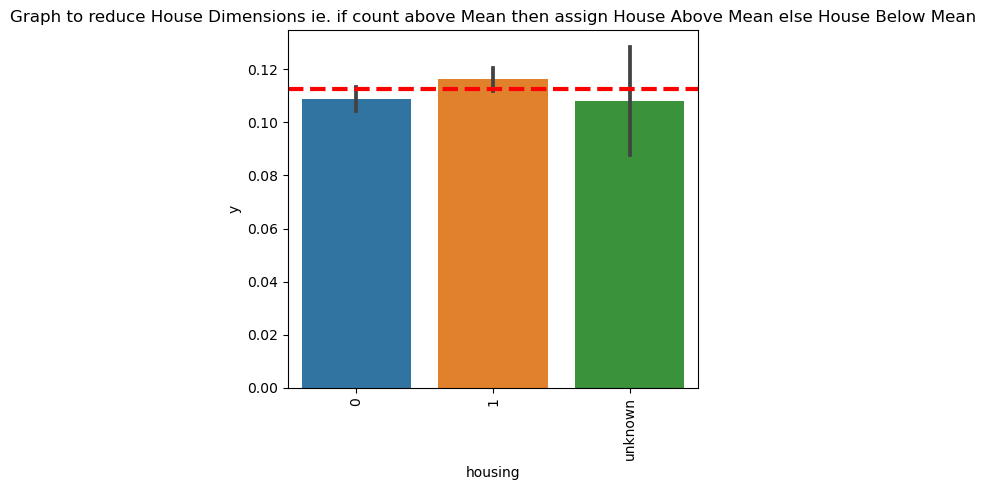

In [17]:
#reducing housing category 
plt.figure(figsize=(5,5))
plt.title("Graph to reduce House Dimensions ie. if count above Mean then assign House Above Mean else House Below Mean")
fig=sns.barplot(x=df2['housing'],y=df2['y'],data=df2)
plt.axhline(df2.y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)
housing_categories={1:'House Above Mean', 0:'House Below Mean','unknown':'House Below Mean'}
df2['housing']=df2['housing'].map(housing_categories)          
df2.housing.isnull().sum()

0

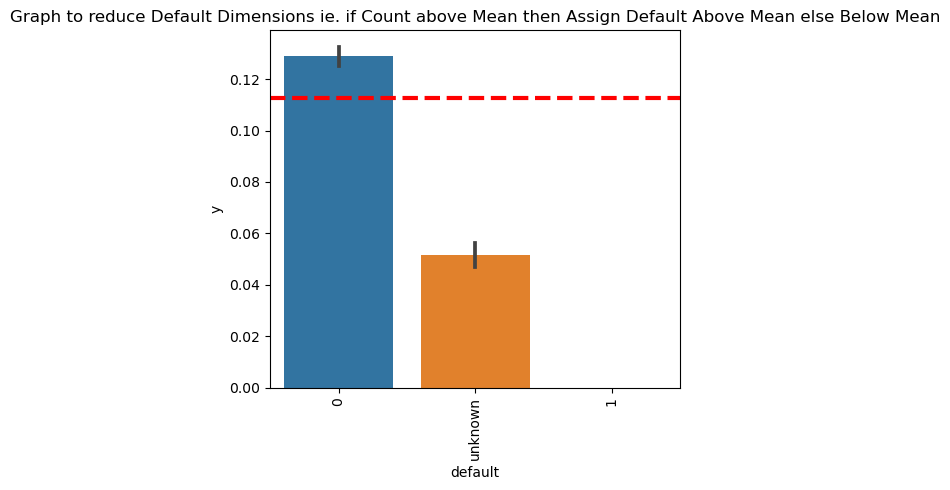

In [18]:
#reducing housing category 
plt.figure(figsize=(5,5))
plt.title("Graph to reduce Default Dimensions ie. if Count above Mean then Assign Default Above Mean else Below Mean")
fig=sns.barplot(x=df2['default'],y=df2['y'],data=df2)
plt.axhline(df2.y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)
default_categories={0:'Default above Mean','unknown':'Default below Mean',1:'Default below Mean'}
df2['default']=df2['default'].map(default_categories)          
df2.default.isnull().sum()

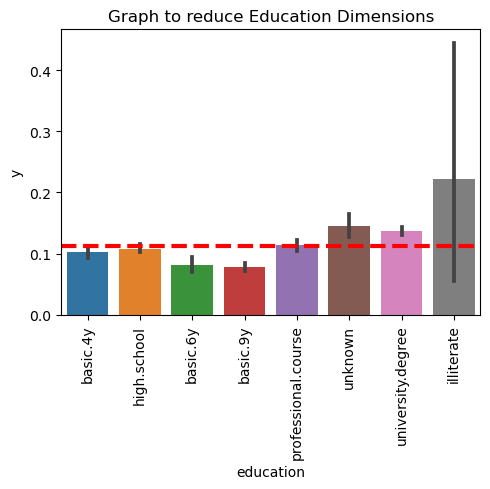

In [19]:
plt.figure(figsize=(5,5))
plt.title("Graph to reduce Education Dimensions")
fig=sns.barplot(x=df2['education'],y=df2['y'],data=df2)
plt.axhline(df2.y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)
education_categories={'basic.4y':'Edu Below Mean',\
                       'high.school':'Edu Below Mean',
                      'basic.6y':'Edu Below Mean', \
                      'basic.9y':'Edu Below Mean',  
                    'professional.course':'Edu Below Mean',
                    'unknown':'Edu Above Mean',
                    'university.degree':'Edu Above Mean',
                    'illiterate':'Edu Above Mean'                
}
df2['education']=df2['education'].map(education_categories)          


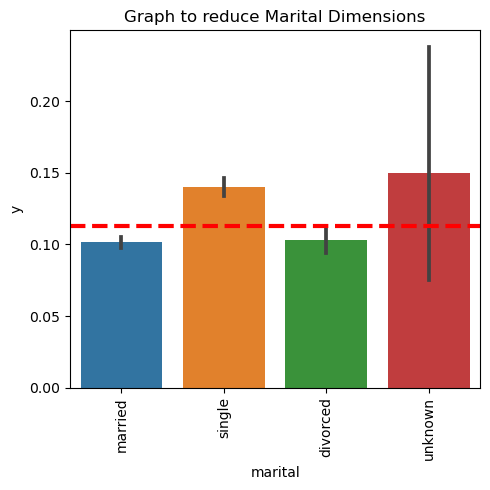

In [20]:
plt.figure(figsize=(5,5))
plt.title("Graph to reduce Marital Dimensions")
fig=sns.barplot(x=df2['marital'],y=df2['y'],data=df2)
plt.axhline(df2.y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)
marital_categories={'married':'marital below mean',\
                       'single':'marital above mean',
                      'divorced':'marital below mean', \
                      'unknown':'marital above mean'    }
df2['marital']=df2['marital'].map(marital_categories)          

0

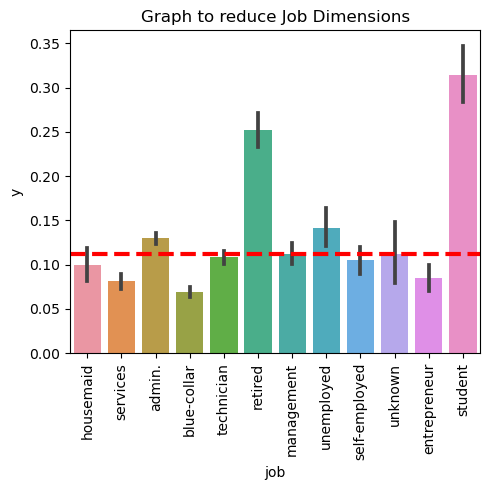

In [21]:
plt.figure(figsize=(5,5))
plt.title("Graph to reduce Job Dimensions")
fig=sns.barplot(x=df2['job'],y=df2['y'],data=df2)
plt.axhline(df2.y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)

job_categories={'housemaid':'job below mean',\
                       'services':'job below mean',
                      'admin.':'job above mean', \
                      'blue-collar':'job below mean',\
                      'technician':'job below mean',\
                      'retired':'job above mean',\
                      'management':'job below mean',\
                       'unemployed':'job above mean',
                        'self-employed':'job below mean',
                        'unknown':'job below mean',
                      'entrepreneur':'job below mean',
                      'student':'job above mean'  }
df2['job']=df2['job'].map(job_categories)          
df2.job.isnull().sum()

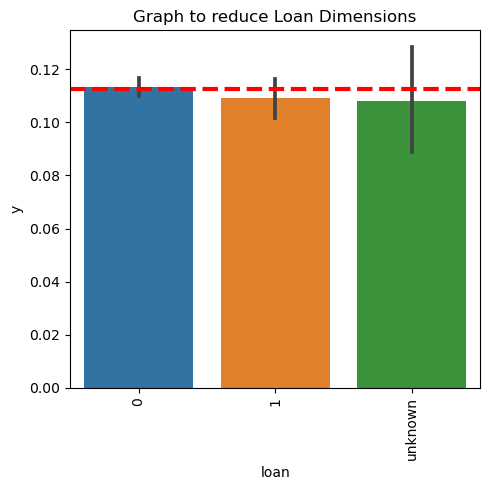

In [22]:
plt.figure(figsize=(5,5))
plt.title("Graph to reduce Loan Dimensions")
fig=sns.barplot(x=df2['loan'],y=df2['y'],data=df2)
plt.axhline(df2.y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=90)
plt.tight_layout(h_pad=1)
loan_categories={0:'loan above mean','unknown':'loan below mean',1:'loan below mean'}
df2['loan']=df2['loan'].map(loan_categories)          

In [23]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay
import time
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss, make_scorer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler 
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [25]:
df2 = df2[['job', 'marital', 'education', 'default', 'housing', 'loan', 'age', 'y']]
X2 = df2.drop('y',axis=1)
y2 = df2['y']

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y2)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [27]:
# Test to make sure there are some yes values in the test set
y_test.sum()

971

In [28]:
X2.sample(5)

,job,marital,education,default,housing,loan,age
13417,job below mean,marital above mean,Edu Below Mean,Default above Mean,House Above Mean,loan above mean,27
33967,job above mean,marital below mean,Edu Above Mean,Default above Mean,House Above Mean,loan above mean,34
13888,job below mean,marital below mean,Edu Below Mean,Default above Mean,House Above Mean,loan above mean,32
19069,job above mean,marital above mean,Edu Above Mean,Default above Mean,House Above Mean,loan above mean,34
8315,job below mean,marital below mean,Edu Below Mean,Default below Mean,House Below Mean,loan above mean,38


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [29]:
categorical_features = ['job', 'marital', 'education','default', 'housing', 'loan']
numerical_features = ['age']

numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])
categorical_transformer = OneHotEncoder(drop="if_binary")

preprocessor_minmax = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [30]:
Baseline_model= Pipeline([("preprocessor", preprocessor_minmax), ('Baseline',MultinomialNB())])

In [31]:
Baseline_model_start = time.time()
Baseline_model.fit(X_train, y_train)
Baseline_model_end = time.time()
Baseline_model_train_time=Baseline_model_end-Baseline_model_start
print(f'Baseline Model Train time  = {Baseline_model_train_time}s')

Baseline Model Train time  = 0.062087059020996094s


In [32]:
Baseline_model_train_accuracy=roc_auc_score(y_train,Baseline_model.predict_proba(X_train)[:, 1])
print(f'Baseline Model Train Accuracy  = {Baseline_model_train_accuracy.round(3)*100}%')
Baseline_model_test_accuracy=roc_auc_score(y_test,Baseline_model.predict_proba(X_test)[:, 1])
print(f'Baseline Model Test Accuracy  = {Baseline_model_test_accuracy.round(3)*100}%')

Baseline Model Train Accuracy  = 58.5%
Baseline Model Test Accuracy  = 60.0%


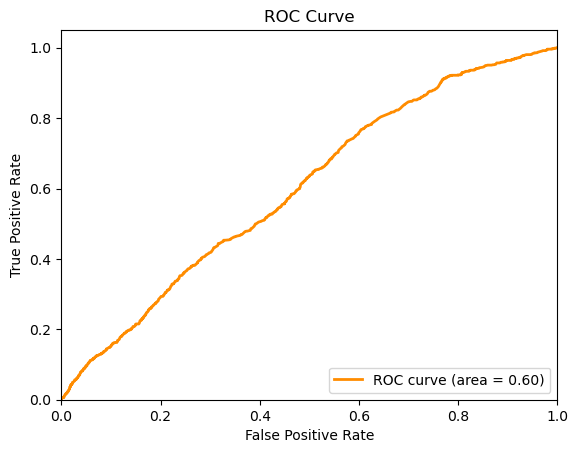

In [33]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities
y_prob = Baseline_model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Proper baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
print(classification_report(y_test,Baseline_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7265
           1       0.00      0.00      0.00       971

    accuracy                           0.88      8236
   macro avg       0.44      0.50      0.47      8236
weighted avg       0.78      0.88      0.83      8236



/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

Log_default= Pipeline([("preprocessor", preprocessor), ('Log',LogisticRegression())])

In [36]:
Log_default_start= time.time()
Log_default.fit(X_train,y_train)
Log_default_end= time.time()
Log_default_train_time=Log_default_end-Log_default_start

print(f'Logistic Regression Model Train time  = {Log_default_train_time}s')

Logistic Regression Model Train time  = 0.07447695732116699s


In [37]:
Log_default_train_accuracy=roc_auc_score(y_train,Log_default.predict_proba(X_train)[:, 1])
print(f'Logistic Regression Model Train Accuracy  = {Log_default_train_accuracy.round(3)*100}%')
Log_default_test_accuracy=roc_auc_score(y_test,Log_default.predict_proba(X_test)[:, 1])
print(f'Logistic Regression Model Test Accuracy  = {Log_default_test_accuracy.round(3)*100}%')


Logistic Regression Model Train Accuracy  = 63.9%
Logistic Regression Model Test Accuracy  = 64.1%


In [38]:
y_pred_Log_default = Log_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_Log_default)
metrics.auc(fp_rate, tp_rate)

0.5

In [39]:
# pip install scikit-plot

### Problem 9: Score the Model

What is the accuracy of your model?

In [40]:
print(classification_report(y_test,Log_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7265
           1       0.00      0.00      0.00       971

    accuracy                           0.88      8236
   macro avg       0.44      0.50      0.47      8236
weighted avg       0.78      0.88      0.83      8236



/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
feature_names = Log_default[:-1].get_feature_names_out()

coefs = pd.DataFrame(
   Log_default['Log'].coef_.T,
   columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
num__age,1.651809
cat__job_job below mean,-0.451615
cat__marital_marital below mean,-0.430314
cat__education_Edu Below Mean,-0.174227
cat__default_Default below Mean,-0.921127
cat__housing_House Below Mean,-0.054136
cat__loan_loan below mean,-0.064024


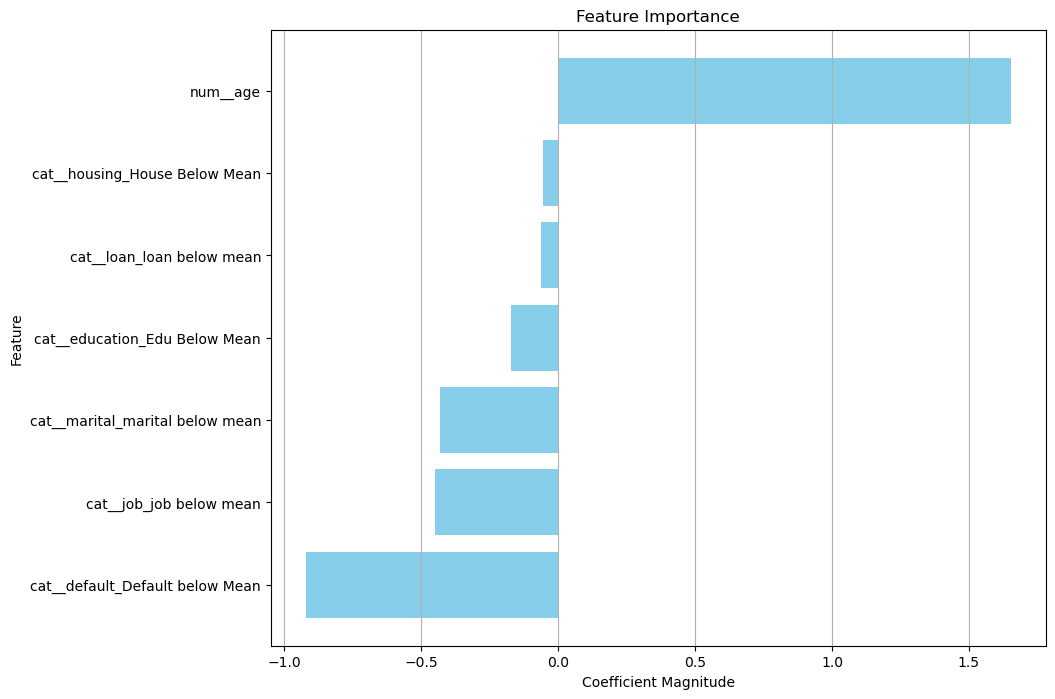

In [42]:
coefs_sorted = coefs.sort_values(by='Coefficients', ascending=1)

# Plot the sorted coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefs_sorted.index, coefs_sorted['Coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(axis='x')
plt.show()

Note: A cross fold validation can be performed to estimate the variability of the important coefficients

<!-- ### Problem 9: Score the Model

What is the accuracy of your model? -->

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [43]:
KNN_default= Pipeline([("preprocessor", preprocessor), ('KNN',KNeighborsClassifier())])
KNN_default_start= time.time()
KNN_default.fit(X_train,y_train)
KNN_default_end= time.time()
KNN_default_train_time=KNN_default_end-KNN_default_start
print(f'KNN Model Train time  = {KNN_default_train_time}s')

KNN Model Train time  = 0.06815195083618164s


In [44]:
KNN_default_train_accuracy=roc_auc_score(y_train,KNN_default.predict_proba(X_train)[:, 1])
print(f'KNN Model Train Accuracy  = {KNN_default_train_accuracy.round(3)*100}%')
KNN_default_test_accuracy=roc_auc_score(y_test,KNN_default.predict_proba(X_test)[:, 1])
print(f'KNN Model Test Accuracy  = {KNN_default_test_accuracy.round(4)*100}%')

y_pred_KNN_default = KNN_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_KNN_default)
metrics.auc(fp_rate, tp_rate)

KNN Model Train Accuracy  = 64.7%
KNN Model Test Accuracy  = 57.64%


0.5240393999984407

In [45]:
print(classification_report(y_test,KNN_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7265
           1       0.31      0.07      0.11       971

    accuracy                           0.87      8236
   macro avg       0.60      0.52      0.52      8236
weighted avg       0.82      0.87      0.83      8236



In [46]:
# As decsion tree numerical inputs dont require scaling - modifying the previous column transformer

categorical_features = ['job', 'marital', 'education','default', 'housing', 'loan']
numerical_features = ['age']
numeric_transformer = Pipeline(
    steps=[
    #("imputer", SimpleImputer(strategy="median")),
    #("scaler", StandardScaler())
    ]
)

categorical_transformer = OneHotEncoder(drop="if_binary")



preprocessor_DT = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])
DT_default= Pipeline([("preprocessor", preprocessor_DT), ('DT',DecisionTreeClassifier())])


In [47]:
DT_default_start= time.time()
DT_default.fit(X_train,y_train)
DT_default_end= time.time()
DT_default_train_time=DT_default_end-DT_default_start
print(f'Decision Tree Model Train time  = {DT_default_train_time}s')

Decision Tree Model Train time  = 0.057214975357055664s


In [48]:
DT_default_train_accuracy=roc_auc_score(y_train,DT_default.predict_proba(X_train)[:, 1])
print(f'Decision Tree Model Train Accuracy  = {DT_default_train_accuracy.round(3)*100}%')
DT_default_test_accuracy=roc_auc_score(y_test,DT_default.predict_proba(X_test)[:, 1])
print(f'Decision Tree Model Test Accuracy  = {DT_default_test_accuracy.round(4)*100}%')

y_pred_DT_default = DT_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_DT_default)
metrics.auc(fp_rate, tp_rate)

Decision Tree Model Train Accuracy  = 63.6%
Decision Tree Model Test Accuracy  = 62.970000000000006%


0.5

In [49]:
print(classification_report(y_test,DT_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7265
           1       0.00      0.00      0.00       971

    accuracy                           0.88      8236
   macro avg       0.44      0.50      0.47      8236
weighted avg       0.78      0.88      0.83      8236



/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
SVM_default= Pipeline(
    steps=[("preprocessor", preprocessor), ('SVC',SVC(probability=True))]
)
SVM_default_start= time.time()
SVM_default.fit(X_train,y_train)
SVM_default_end= time.time()
SVM_default_train_time=SVM_default_end-SVM_default_start
print(f'SVM Model Train time  = {SVM_default_train_time}s')
SVM_default_train_accuracy=roc_auc_score(y_train,SVM_default.predict_proba(X_train)[:, 1])
print(f'SVM Model Train Accuracy  = {SVM_default_train_accuracy.round(3)*100}%')
SVM_default_test_accuracy=roc_auc_score(y_test,SVM_default.predict_proba(X_test)[:, 1])
print(f'SVM Model Test Accuracy  = {SVM_default_test_accuracy.round(3)*100}%')
y_pred_SVM_default = SVM_default.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_SVM_default)
metrics.auc(fp_rate, tp_rate)

SVM Model Train time  = 67.70858478546143s
SVM Model Train Accuracy  = 48.6%
SVM Model Test Accuracy  = 47.199999999999996%


0.5

In [51]:
print(classification_report(y_test,SVM_default.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7265
           1       0.00      0.00      0.00       971

    accuracy                           0.88      8236
   macro avg       0.44      0.50      0.47      8236
weighted avg       0.78      0.88      0.83      8236



/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chadhas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
res_dict = {'model': ['Baseline (NaiveBayes)','Logistic Regression','KNN','DecisonTree','SVM'],
           'Train Time': [Baseline_model_train_time,Log_default_train_time,KNN_default_train_time,DT_default_train_time,\
                          SVM_default_train_time],
           'Train Accuracy': [Baseline_model_train_accuracy,Log_default_train_accuracy,KNN_default_train_accuracy,DT_default_train_accuracy,
                                    SVM_default_train_accuracy],
           'Test Accuracy': [Baseline_model_test_accuracy,Log_default_test_accuracy,KNN_default_test_accuracy,DT_default_test_accuracy,\
                                   SVM_default_test_accuracy]}
results_df = pd.DataFrame(res_dict).set_index('model')
#round off the values to nearest 2 decimal places for the results

results_df = results_df.round(decimals = 2)
results_df

,Train Time,Train Accuracy,Test Accuracy
model,,,
Baseline (NaiveBayes),0.06,0.58,0.60
Logistic Regression,0.07,0.64,0.64
KNN,0.07,0.65,0.58
DecisonTree,0.06,0.64,0.63
SVM,67.71,0.49,0.47


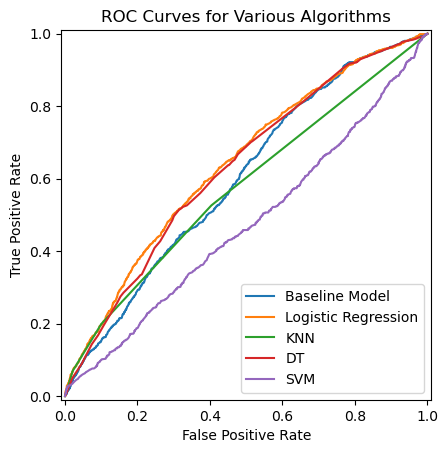

In [53]:
from sklearn.metrics import roc_curve, RocCurveDisplay
# import matplotlib.pyplot as plt

# Assuming Baseline_model is your classifier and X_test, y_test are your test data
fpr, tpr, _ = roc_curve(y_test, Baseline_model.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=plt.gca(),label='Baseline Model')

fpr, tpr, _ = roc_curve(y_test, Log_default.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=plt.gca(),label='Logistic Regression')


fpr, tpr, _ = roc_curve(y_test, KNN_default.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=plt.gca(),label='KNN')


fpr, tpr, _ = roc_curve(y_test, DT_default.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=plt.gca(),label='DT')


fpr, tpr, _ = roc_curve(y_test, SVM_default.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=plt.gca(),label='SVM')


plt.title('ROC Curves for Various Algorithms')
plt.show()

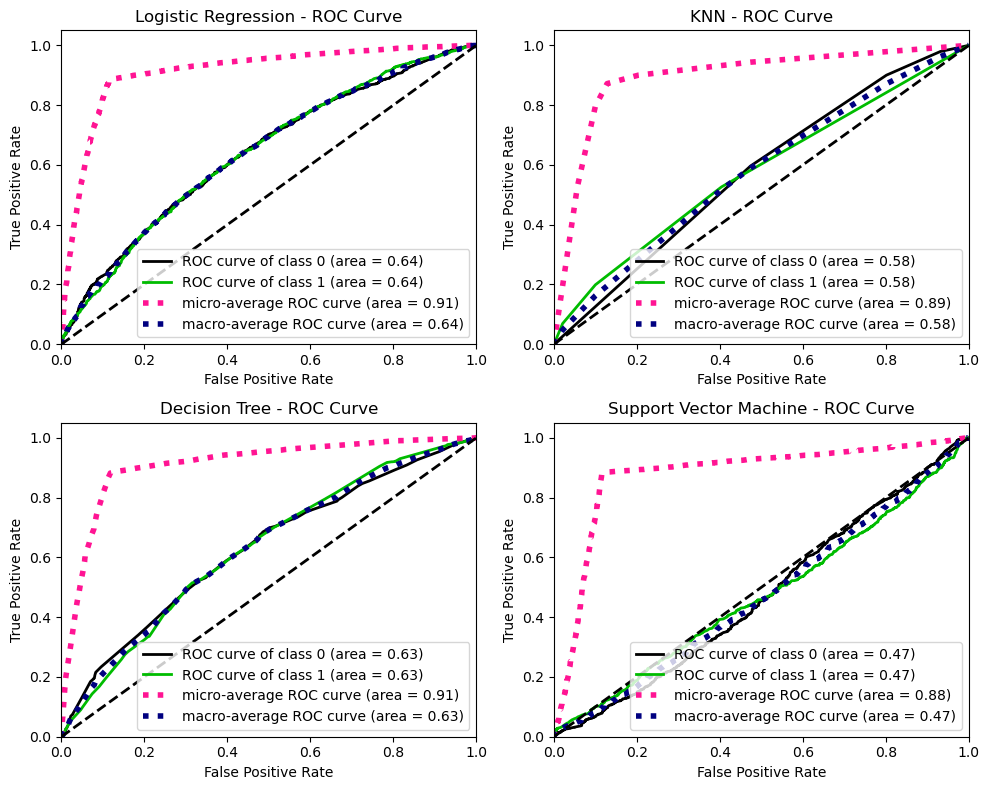

In [54]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc_curve
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plot_roc_curve(y_test, Log_default.predict_proba(X_test), ax=axs[0, 0])
axs[0, 0].set_title('Logistic Regression - ROC Curve')

plot_roc_curve(y_test, KNN_default.predict_proba(X_test), ax=axs[0, 1])
axs[0, 1].set_title('KNN - ROC Curve')

plot_roc_curve(y_test, DT_default.predict_proba(X_test), ax=axs[1, 0])
axs[1, 0].set_title('Decision Tree - ROC Curve')

plot_roc_curve(y_test, SVM_default.predict_proba(X_test), ax=axs[1, 1])
axs[1, 1].set_title('Support Vector Machine - ROC Curve')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Summarize Lift Plots for various algorithms


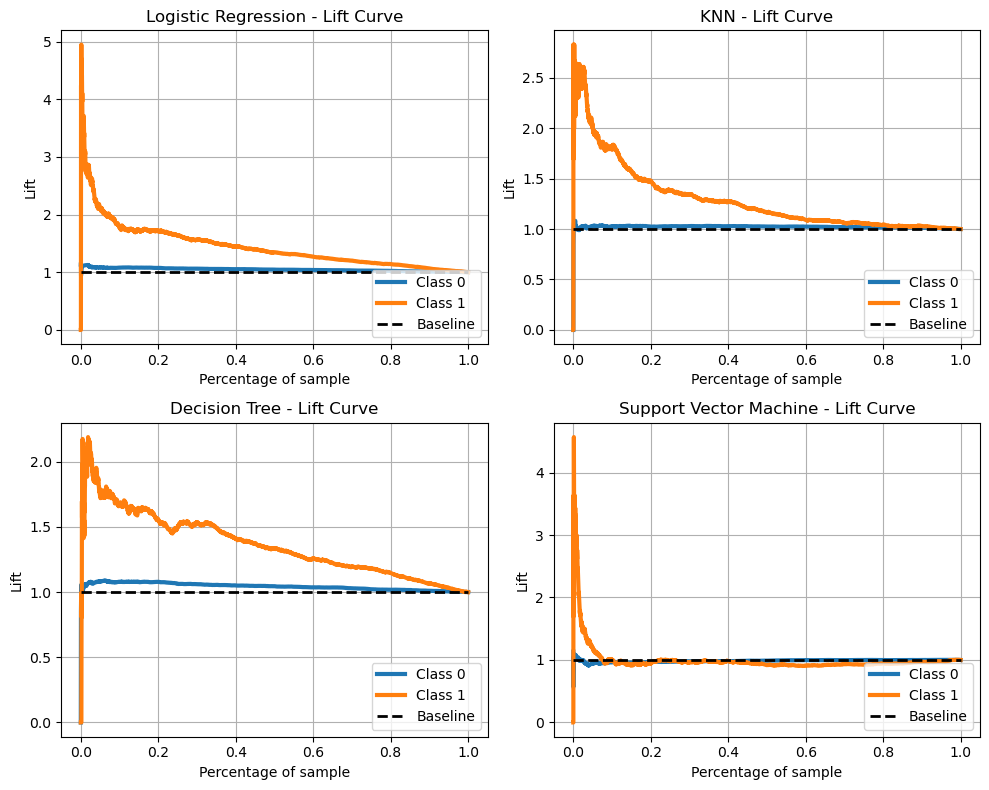

In [55]:
print('Summarize Lift Plots for various algorithms')

from scikitplot.metrics import plot_lift_curve


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plot_lift_curve(y_test, Log_default.predict_proba(X_test), ax=axs[0, 0])
axs[0, 0].set_title('Logistic Regression - Lift Curve')

plot_lift_curve(y_test, KNN_default.predict_proba(X_test), ax=axs[0, 1])
axs[0, 1].set_title('KNN - Lift Curve')

plot_lift_curve(y_test, DT_default.predict_proba(X_test), ax=axs[1, 0])
axs[1, 0].set_title('Decision Tree - Lift Curve')

plot_lift_curve(y_test, SVM_default.predict_proba(X_test), ax=axs[1, 1])
axs[1, 1].set_title('Support Vector Machine - Lift Curve')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Summarize Confusion Matrix


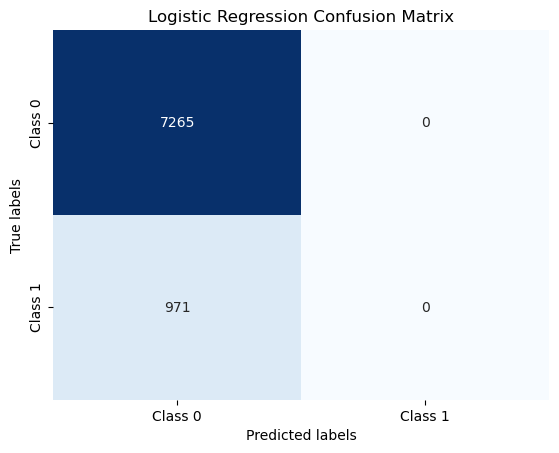

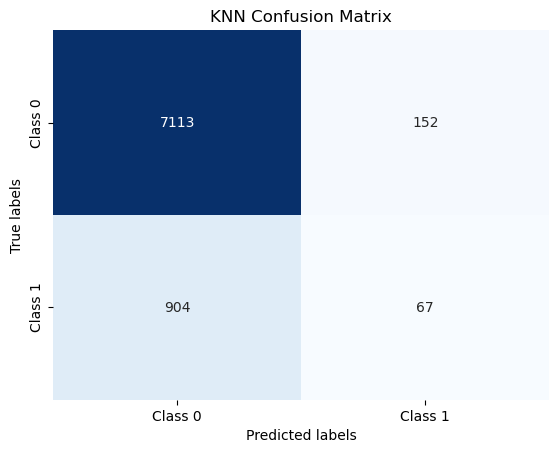

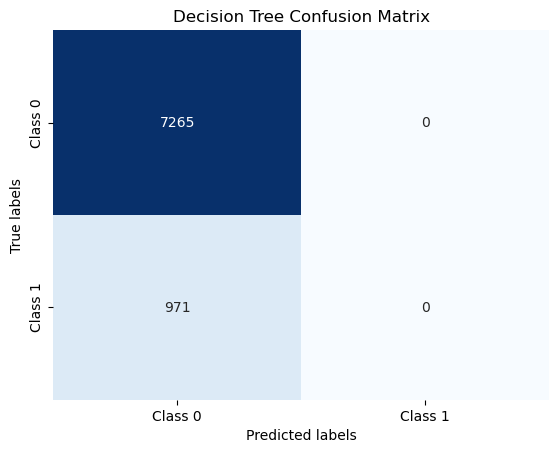

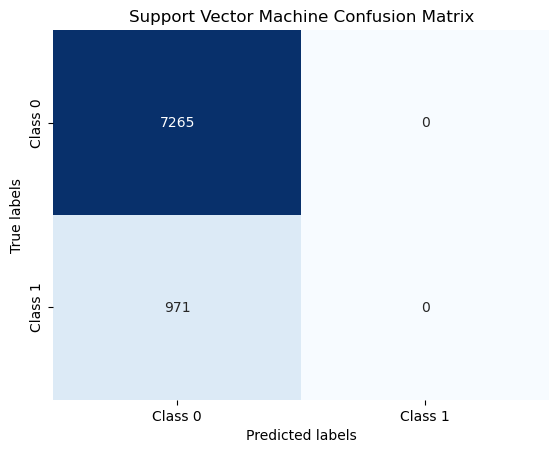

<Figure size 640x480 with 0 Axes>

In [56]:
print('Summarize Confusion Matrix')

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels=None,title=None):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title + ' Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, Log_default.predict(X_test), labels=['Class 0', 'Class 1'],title='Logistic Regression')
plot_confusion_matrix(y_test, KNN_default.predict(X_test), labels=['Class 0', 'Class 1'],title='KNN')
plot_confusion_matrix(y_test, DT_default.predict(X_test), labels=['Class 0', 'Class 1'],title='Decision Tree')
plot_confusion_matrix(y_test, SVM_default.predict(X_test), labels=['Class 0', 'Class 1'],title='Support Vector Machine')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Attempting to increase accuracy by including more features
Numeric: age, campaign, pdays_binary, previous, emp.var.var, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
Object: job, marital, education, housing, loan, contact, month, day_of_week, poutcome

In [57]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [59]:
# Recreate df_NAcheck to make re-running the next few cells easier (for testing)
df_NAcheck = df.copy()
df_NAcheck.replace("unknown", np.nan, inplace=True)


In [60]:
# Impute unknown values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
mappings = {}

# Encode categorical columns and extract mappings, to re-convert to missing values
for column in df_NAcheck.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    # Store the original values
    original_values = df_NAcheck[column].astype(str)
    df_NAcheck[column] = le.fit_transform(original_values)
    label_encoders[column] = le
    # Create a mapping from original to encoded values
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

for column, mapping in mappings.items():
    if 'nan' in mapping:
        df_NAcheck[column].replace(mapping['nan'], np.nan, inplace=True)

In [61]:
df_NAcheck.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [62]:
imputer = KNNImputer(n_neighbors = 10)
imputed_df = pd.DataFrame(imputer.fit_transform(df_NAcheck), columns = df_NAcheck.columns)

# decode
for column, le in label_encoders.items():
    imputed_df[column] = le.inverse_transform(imputed_df[column].astype(int))
 

In [63]:
df_clean = imputed_df.copy()
df_clean = df_clean.replace('nan', np.nan)
df_clean.dropna(inplace=True)
df_clean.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [64]:
# Any duplicates? If so, drop.
df_clean.duplicated().sum()

14

In [65]:
df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()

0

Feature transformations: Convert y to numeric (ie. 'yes' =1)
Remove:
default because it's almost entirely one value (extremely unbalanced class)
duartion becuase the data dictionary notes that it should be removed
log-transform age and to make more normal
remove outliers (+/- 3 SDs) for:
campaign
previous
pdays: create a second column indicating whether someone was contacted or not, and change 999 in pdays to 'nan' values
 

In [66]:
# reassign `df`
df = df_clean.copy()
df['y'] = df['y'].map({"yes": 1, "no": 0}) # making acceptance numeric 
df = df.drop(['default'], axis=1) # almost all values are one of a kind so remove from analysis 
df = df.drop(['duration'], axis=1)
df['age'] = np.log(df['age']) # log transfomration to make age normal 
# campaign and previous measures contact with customers; check for correlation, since we might expect them to be
df['previous'] = df_clean['previous']


In [67]:
df['pdays'] = df['pdays'].apply(lambda x: x if x < 999 else np.nan)
df['pdays'] = df_clean.loc[:,'pdays']
df['pdays'] = df['pdays'].apply(lambda x: 1 if x == 999 else 0)
df['pdays'] = df_clean.loc[:,'pdays']
df['pdays_binary'] = df['pdays'].apply(lambda x: 1 if x == 999 else 0)


In [68]:
# create column names for use later and X and y
X_columns = ['age', 'campaign', 'pdays_binary', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
            'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
X, y = df[X_columns], df['y']

In [69]:
# pip install cython


In [70]:
# !pip uninstall -y scikit-learn imbalanced-learn
# !pip install scikit-learn==1.0.2 imbalanced-learn==0.8.1

# # Now try importing again
# try:
#     from imblearn.over_sampling import SMOTENC
#     print("SMOTENC imported successfully!")
# except ImportError as e:
#     print(f"ImportError: {e}")


In [71]:
# pip install imbalanced-learn

In [72]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

X, y = df[X_columns], df['y']

object_features = df.select_dtypes(include = ['object']).columns

label_encoders = {}
mappings = {}

for column in object_features:
    le = LabelEncoder()
    X[column] = le.fit_transform(X.loc[:,column])
    label_encoders[column] = le
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [73]:
object_indices = [X.columns.get_loc(col) for col in object_features]

smotenc = SMOTENC(categorical_features = object_indices, sampling_strategy = 0.2, random_state = 42)
X_resampled, y_resampled = smotenc.fit_resample(X, y)

In [74]:
# decode
for column, le in label_encoders.items():
    X_resampled[column] = le.inverse_transform(X_resampled[column].astype(int))

X_resampled


,age,campaign,pdays_binary,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
0,4.025352,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,housemaid,married,basic.4y,no,no,telephone,may,mon,nonexistent
1,4.043051,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,services,married,high.school,no,no,telephone,may,mon,nonexistent
2,3.610918,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,services,married,high.school,yes,no,telephone,may,mon,nonexistent
3,3.688879,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,admin.,married,basic.6y,no,no,telephone,may,mon,nonexistent
4,4.025352,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,services,married,high.school,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43597,3.203757,1.629628,1,0.0,-1.8,93.075,-47.1,1.407481,5099.1,admin.,single,university.degree,yes,no,cellular,apr,thu,nonexistent
43598,3.068324,2.136515,1,0.0,-1.1,94.601,-49.5,1.035908,4963.6,student,single,high.school,no,no,cellular,oct,tue,nonexistent
43599,3.559075,2.000000,1,0.0,-1.8,92.893,-46.2,1.327000,5099.1,blue-collar,single,basic.9y,no,no,cellular,may,thu,nonexistent
43600,3.580168,3.000000,1,0.0,1.4,94.465,-41.8,4.955000,5228.1,blue-collar,married,basic.4y,yes,no,telephone,jun,thu,nonexistent


In [75]:
df = pd.concat([X_resampled, y_resampled], axis = 1)
df

,age,campaign,pdays_binary,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
0,4.025352,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,housemaid,married,basic.4y,no,no,telephone,may,mon,nonexistent,0
1,4.043051,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,services,married,high.school,no,no,telephone,may,mon,nonexistent,0
2,3.610918,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,services,married,high.school,yes,no,telephone,may,mon,nonexistent,0
3,3.688879,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,admin.,married,basic.6y,no,no,telephone,may,mon,nonexistent,0
4,4.025352,1.000000,1,0.0,1.1,93.994,-36.4,4.857000,5191.0,services,married,high.school,no,yes,telephone,may,mon,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43597,3.203757,1.629628,1,0.0,-1.8,93.075,-47.1,1.407481,5099.1,admin.,single,university.degree,yes,no,cellular,apr,thu,nonexistent,1
43598,3.068324,2.136515,1,0.0,-1.1,94.601,-49.5,1.035908,4963.6,student,single,high.school,no,no,cellular,oct,tue,nonexistent,1
43599,3.559075,2.000000,1,0.0,-1.8,92.893,-46.2,1.327000,5099.1,blue-collar,single,basic.9y,no,no,cellular,may,thu,nonexistent,1
43600,3.580168,3.000000,1,0.0,1.4,94.465,-41.8,4.955000,5228.1,blue-collar,married,basic.4y,yes,no,telephone,jun,thu,nonexistent,1


In [76]:
df['y'].value_counts(normalize=True)
print('Resampling increased the acceptance')

Resampling increased the acceptance


In [77]:
# train-test split here, then object column encoding
X, y = df[X_columns], df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

pd.concat([y_train.value_counts(normalize = True), y_test.value_counts(normalize = True)], axis = 1)

,proportion,proportion
y,,
0,0.833319,0.833391
1,0.166681,0.166609


In [78]:
ohe_features = {'marital': 'married',
                'housing': 'yes',
                'loan': 'yes',
                'contact': 'cellular',
                'poutcome': 'nonexistent'} # keys are column names, values are baseline values
te_features = ['job', 'education', 'month', 'day_of_week']
num_features = ['age', 'campaign', 'pdays_binary', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [79]:
# Encoders and other important functions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder # I tried TargetEncoder fro sklearn.preprocessing, but kept getting an 'out of memory' error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [80]:
# create column transformer
column_encoder = ColumnTransformer(
    transformers = [
        ('OHE', OneHotEncoder(sparse_output=False, drop = list(ohe_features.values())), list(ohe_features.keys())),
        ('TE', Pipeline([ # want to both TE, then scale
            ('target_encoder', TargetEncoder()),
            ('scaler', StandardScaler())
            ]), te_features),
        ('scaler', StandardScaler(), num_features)
    ],
    remainder = 'drop'
)

In [81]:
logpipe = Pipeline([
    ('encode', column_encoder),
    ('log', LogisticRegression(random_state = 42))
])

# search over different penalty options
log_grid = {'log__penalty': ['l1', 'l2', None],
            'log__solver': ['liblinear', 'lbfgs']}

logsearch = GridSearchCV(logpipe, log_grid, cv=5, scoring='accuracy', verbose=1)

logsearch.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(transformers=[('OHE',
                                                                         OneHotEncoder(drop=['married',
                                                                                             'yes',
                                                                                             'yes',
                                                                                             'cellular',
                                                                                             'nonexistent'],
                                                                                       sparse_output=False),
                                                                         ['marital',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('TE',
                                                                         Pipeline(steps=[('target_encoder',
                                                                                          TargetEncoder()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['job',
                                                                          'education',
                                                                          'month',
                                                                          'day_of_week']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'campaign',
                                                                          'pdays_binary',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed'])])),
                                       ('log',
                                        LogisticRegression(random_state=42))]),
             param_grid={'log__penalty': ['l1', 'l2', None],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [82]:
logsearch.best_estimator_.get_params()

{'memory': None,
 'steps': [('encode', ColumnTransformer(transformers=[('OHE',
                                    OneHotEncoder(drop=['married', 'yes', 'yes',
                                                        'cellular',
                                                        'nonexistent'],
                                                  sparse_output=False),
                                    ['marital', 'housing', 'loan', 'contact',
                                     'poutcome']),
                                   ('TE',
                                    Pipeline(steps=[('target_encoder',
                                                     TargetEncoder()),
                                                    ('scaler', StandardScaler())]),
                                    ['job', 'education', 'month', 'day_of_week']),
                                   ('scaler', StandardScaler(),
                                    ['age', 'campaign', 'pdays_binary', 'previous',


In [83]:
print(f" Modified Logistic Regression Train accuracy: {logsearch.score(X_train, y_train)}")
print(f" Modified Logistic Regression Test accuracy: {logsearch.score(X_test, y_test)}")

 Modified Logistic Regression Train accuracy: 0.8625326108769817
 Modified Logistic Regression Test accuracy: 0.8648090815273478


In [84]:
logmodel = logsearch.best_estimator_['log']
logencoder = logsearch.best_estimator_['encode']
pd.DataFrame({'feature': logencoder.get_feature_names_out(), 'coefficient': logmodel.coef_[0], 'coef_abs': np.abs(logmodel.coef_[0])}).sort_values(['coef_abs'], ascending = False)

,feature,coefficient,coef_abs
15,scaler__emp.var.rate,-1.295588,1.295588
4,OHE__contact_telephone,-1.134675,1.134675
16,scaler__cons.price.idx,0.912477,0.912477
5,OHE__poutcome_failure,-0.610879,0.610879
19,scaler__nr.employed,0.483734,0.483734
18,scaler__euribor3m,-0.353683,0.353683
0,OHE__marital_divorced,-0.297126,0.297126
13,scaler__pdays_binary,-0.295668,0.295668
3,OHE__loan_no,0.260658,0.260658
17,scaler__cons.conf.idx,0.241412,0.241412


In [85]:
feature_names = logencoder.get_feature_names_out()

coefs = pd.DataFrame(
   logmodel.coef_[0],
   columns=["Coefficients"],
    index=feature_names,
)


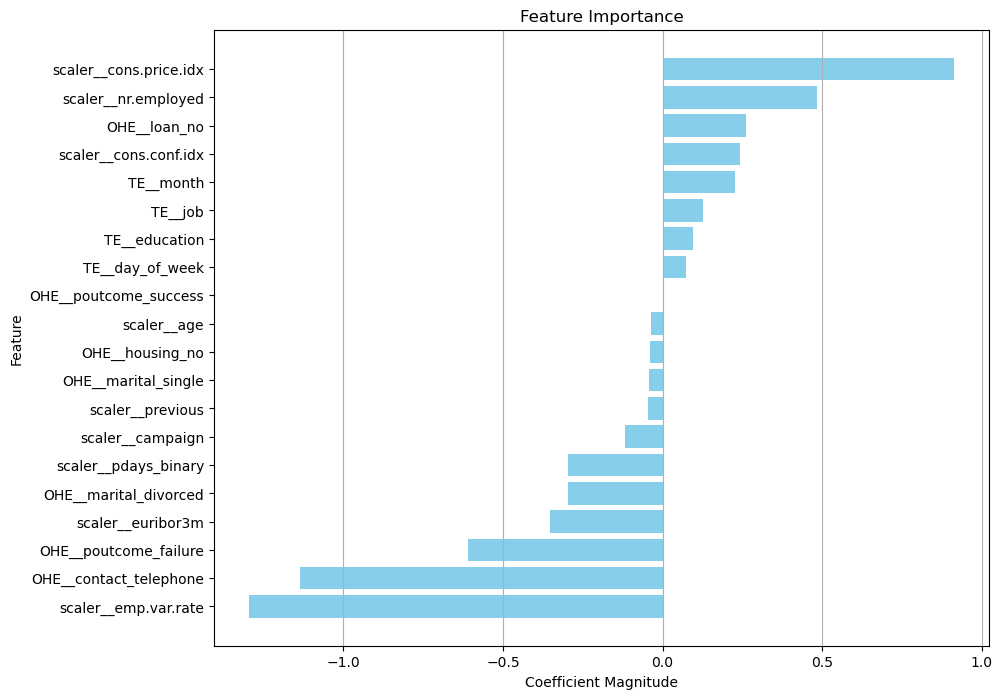

In [86]:
coefs_sorted = coefs.sort_values(by='Coefficients', ascending=1)

# Plot the sorted coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefs_sorted.index, coefs_sorted['Coefficients'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(axis='x')
plt.show()

In [87]:
y_pred = logsearch.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8067
           1       0.32      0.71      0.44       654

    accuracy                           0.86      8721
   macro avg       0.65      0.79      0.68      8721
weighted avg       0.92      0.86      0.89      8721



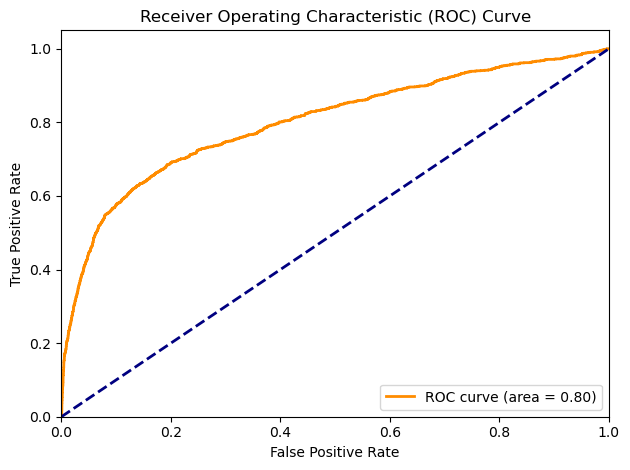

In [88]:
# Get predicted probabilities
y_pred_prob = logsearch.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot curves
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

A similar analysis can be performed based on KNN, DT and SVM but was not perfomred in this section. Logistic Regression was chosen because of initial highest accuracy and test score.
Summary: Upon increasing the attributes for regression consideration, the logistic regression model accuracy increased to 89% and a ROC-AUC value of 0.86.   

Economic variables having corrleation to the consumer purchasing power of the bank service. From Permutation importance, we can see importance arising from employee variation rate, euribor 3 month rate (euribor3m), and consumer price index.

Banks can segment customers based on categories as identified from the importance table eg. when to contact, how to contact, previous service acceptance, etc  

Other consideration not present in the study (eg customer account balance, complaints, frequency of commuincation, etc) to the bank can assist in building a stronger model.